In [97]:
#### Senario 1. Single risk - Missort or labels issues or operational issues
# operational risk: What if uph is only 60%? 
### Senario 2. Double risk: 
# Wage inflation risk: what if the hourly rate increased by 10% in the meanwhile the uph is only 80%?
### Senario 3. Capex Overrun
# What if the postpone happened, capex overrun?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the csv document
df = pd.read_csv('Copy of Automation ROI Model - PAR3 ROI Model.csv', header=None)
data = df.values.tolist()

#Clean data with"NaH","€"
def clean(val):
    val_str = str(val).replace('€', '').replace(',', '').replace('"', '').replace(' ', '').strip()
    if val_str in ['-', '', 'nan', 'None']: return None
    
    try:
        return float(val_str)
    except:
        return None

def get_hourlyrate_right(data, key):
    for row in data:
        if key in row: 
            check_list = row[row.index(key) + 1 :]
            for cell in check_list:
                cleaned_val = clean(cell)
                if cleaned_val is not None: 
                    return cleaned_val
    return None

rate= get_hourlyrate_right(data, "Hourly rate")
print(f"Hourly rate={rate}")

def get_4yrsvolume_match(data, key_row_name, years_to_find):
    col_map = {}
    
    target_years_str = [str(y) for y in years_to_find]
    
    for row in data:
        row_str = [str(cell).replace('.0', '').strip() for cell in row]
        
        if target_years_str[0] in row_str:
            for year in target_years_str:
                if year in row_str:
                    col_map[year] = row_str.index(year)
            break 
            
    if not col_map:
        return "Error: Years not found in header"

    key_row_name = key_row_name.strip()
    for row in data:
        for cell in row:
            if str(cell).strip() == key_row_name:
                results = []
                for year in target_years_str:
                    col_index = col_map.get(year)
                    
                    if col_index is not None and col_index < len(row):
                        raw_val = row[col_index]
                        results.append(clean(raw_val))
                    else:
                        results.append(None)
                return results

    return None

target_years = [2026, 2027, 2028, 2029]
s2_sort_volumes = get_4yrsvolume_match(data, "Incremental S2 Sort", target_years)
print(f"Incremental S2 Sort ({target_years}): {rate}")


maintenance_fee = None
automation_capex = None

matches = df.stack()[df.stack().astype(str).str.contains("Option B", case=False, na=False)]

if not matches.empty:
    target_row_idx, target_col_idx = matches.index[0]
    
    df_clean = df.iloc[target_row_idx:].copy()
    
    df_clean.columns = df_clean.iloc[0].fillna('').astype(str)
    df_clean = df_clean[1:] 
    
    target_col_name = df_clean.columns[target_col_idx]
    
    search_area = df_clean.iloc[:, :3].astype(str)

    def get_cleaned_value(keyword):
        mask = search_area.apply(lambda row: row.str.contains(keyword, case=False, na=False).any(), axis=1)
        
        if mask.any():
            raw_value = df_clean.loc[mask, target_col_name].values[0]
            return clean(raw_value)
        return None

    maintenance_fee = get_cleaned_value("Yearly Maintenance")
    automation_capex = get_cleaned_value("Automation Capex")

    print(f"Maintenance Fee : {maintenance_fee}")
    print(f"Automation Capex: {automation_capex}")


Hourly rate=24.5
Incremental S2 Sort ([2026, 2027, 2028, 2029]): 24.5
Maintenance Fee : 100000.0
Automation Capex: 730000.0


In [41]:

matches = df.stack()[df.stack().astype(str).str.contains("Option B", case=False, na=False)]

if not matches.empty:
    target_row_idx, target_col_idx = matches.index[0]
    df_clean = df.iloc[target_row_idx:].copy()
    hc_col_index = target_col_idx + 1
    search_area = df_clean.iloc[:, :3].astype(str)

    def get_HC_value(row_keyword, col_offset_idx):
        mask = search_area.apply(lambda row: row.str.contains(row_keyword, case=False, na=False).any(), axis=1)
        

        if mask.any():
            target_row = df_clean.loc[mask].iloc[0]
        
            raw_val = target_row.iloc[col_offset_idx]
            
            return clean(raw_val)
        return None

    peak_hc_2029 = get_HC_value("2029 Peak", hc_col_index)

    print(f"HC of option B: {peak_hc_2029}")



    

HC of option B: 375.0


In [49]:
def get_CPP_value(row_keyword, col_offset_idx):
    mask = search_area.apply(lambda row: row.str.contains(row_keyword, case=False, na=False).any(), axis=1)

    if mask.any():
        target_row = df_clean.loc[mask].iloc[0]
        raw_val = target_row.iloc[col_offset_idx] 
        return clean(raw_val)
    return None


peak_CPP_2029 = get_CPP_value("2029 Peak", hc_col_index + 1) 

print(f"CPP of option B: {peak_CPP_2029}")

CPP of option B: 0.39


In [85]:
s2_sort_2029 = rate[-1]
base_uph_per_fte = s2_sort_2029 / peak_hc_2029 

print(f"Base UPH: {base_uph_per_fte:.2f}")

Base UPH: 422.26


In [58]:
def clean(raw_val):
    if isinstance(raw_val, str):
        return raw_val.replace('€', '').replace(',', '').strip()
    return raw_val

def get_CPP_value(row_keyword, col_offset_idx):

    mask = df_clean.astype(str).apply(
        lambda row: row.str.contains(row_keyword, case=False, na=False).any(), 
        axis=1
    )

    if mask.any():

        target_row = df_clean.loc[mask].iloc[0]

        raw_val = target_row.iloc[col_offset_idx] 
        return clean(raw_val)
    return None



OFFSET = 2 

hc_costs_2029 = get_CPP_value("2029 HC", hc_col_index + OFFSET) 

savings_2029 = get_CPP_value("2029 Savings", hc_col_index + OFFSET)

print(f"Option B - 2029 HC Costs: {hc_costs_2029}")
print(f"Option B - 2029 Savings: {savings_2029}")



Option B - 2029 HC Costs: 34404312
Option B - 2029 Savings: 11785368


In [121]:
# The data above is what we get from the ROI model and it's also our baseline in this risk analysis model.
Base_Volume = s2_sort_2029
Base_UPH= base_uph_per_fte # This UPH is calculated based on the largest throughput in 2029 and the highest efficiency
Base_Rate= rate
Base_Capex= automation_capex
Efficiency_Factor_1= 0.6
Efficiency_Factor_2= 0.8

DAYS_PER_YEAR = 312
HOURS_PER_DAY = 18
ANNUAL_WORKING_HOURS = DAYS_PER_YEAR * HOURS_PER_DAY

#### Senario 1. Single risk - Missort or labels issues or operational issues
# operational risk: What if uph is only 60%? 
Scenario1_UPH = Base_UPH * Efficiency_Factor_1
Scenario1_Rate = Base_Rate
base_labor_cost = peak_hc_2029 * Base_Rate * ANNUAL_WORKING_HOURS
new_labor_cost = required_hc * Scenario1_Rate * ANNUAL_WORKING_HOURS
labor_cost_diff = new_labor_cost - base_labor_cost
S1_pct = (labor_cost_diff/ base_labor_cost) * 100

def calculate_impact(scenario_1, vol, uph, rate, capex):
    required_hc = peak_hc_2029 * (Base_UPH / uph)  
    print(f"\n[Analysis]{scenario_1} :Results:")
    print(f"  - 60% UPH: {uph:.2f}")
    print(f"  - HC needed: {required_hc:.1f}  (Difference: {required_hc - peak_hc_2029:+.1f} )")             
    print(f"New labor cost: €{new_labor_cost:,.0f}")
    print(f" Lost : €{labor_cost_diff:+,.0f} / per year (cost increase {S1_pct:.1f}%)")

    return required_hc

required_hc = calculate_impact("Senario 1: operational risk (UPH 60%)", Base_Volume, Scenario1_UPH, Scenario1_Rate, Base_Capex)

      
### Senario 2. Double risk: 
# Wage inflation risk: what if the hourly rate increased by 10% in the meanwhile the uph is only 80%?
print("\n[Analysis] Scenario 2: Double Risk (Efficiency 80% + Wage Inflation 10%)")
Scenario2_UPH = Base_UPH * Efficiency_Factor_2
Scenario2_Rate = Base_Rate * 1.1

s2_required_hc = peak_hc_2029 * (Base_UPH / Scenario2_UPH)
s2_hc_diff = s2_required_hc - peak_hc_2029

s2_labor_cost = s2_required_hc * Scenario2_Rate * ANNUAL_WORKING_HOURS
s2_cost_diff = s2_labor_cost - base_labor_cost
s2_pct = (s2_cost_diff / base_labor_cost) * 100

print(f"  - Actual UPH: {Scenario2_UPH:,.0f}")
print(f"  - Required HC: {s2_required_hc:.1f} (Increase: +{s2_hc_diff:.1f} HC)")
print(f"  - New Rate    : €{Scenario2_Rate:.2f}")
print(f"  - Annual Cost : €{s2_labor_cost:,.0f}")
print(f"  >>> Risk Cost : €{s2_cost_diff:+,.0f} /year (Cost Increase {s2_pct:.1f}%)")

### Senario 3. Capex Overrun
# What if the postpone happened, capex overrun?
print("\n[Analysis] Scenario 3: Capex Overrun (+20%)")

New_Capex = Base_Capex * (1 + 0.2)
s3_capex_diff = New_Capex - Base_Capex

print(f"  - Baseline Capex: €{Base_Capex:,.0f}")
print(f"  - Actual Capex  : €{New_Capex:,.0f}")
print(f"  >>> Extra Cost  : €{s3_capex_diff:+,.0f} (One-time loss)")


[Analysis]Senario 1: operational risk (UPH 60%) :Results:
  - 60% UPH: 253.36
  - HC needed: 625.0  (Difference: +250.0 )
New labor cost: €85,995,000
 Lost : €+34,398,000 / per year (cost increase 66.7%)

[Analysis] Scenario 2: Double Risk (Efficiency 80% + Wage Inflation 10%)
  - Actual UPH: 338
  - Required HC: 468.7 (Increase: +93.7 HC)
  - New Rate    : €26.95
  - Annual Cost : €70,945,875
  >>> Risk Cost : €+19,348,875 /year (Cost Increase 37.5%)

[Analysis] Scenario 3: Capex Overrun (+20%)
  - Baseline Capex: €730,000
  - Actual Capex  : €876,000
  >>> Extra Cost  : €+146,000 (One-time loss)



FINAL REPORT GENERATION

--- Summary Table ---
                       Scenario  Headcount  Annual_Opex  Risk_Impact_Opex
0            Baseline (No Risk)       €375  €51,597,000                €0
1  Scenario 1: Operational Risk       €625  €85,995,000       €34,398,000
2       Scenario 2: Double Risk       €469  €70,945,875       €19,348,875
3     Scenario 3: Capex Overrun       €375  €51,597,000                €0


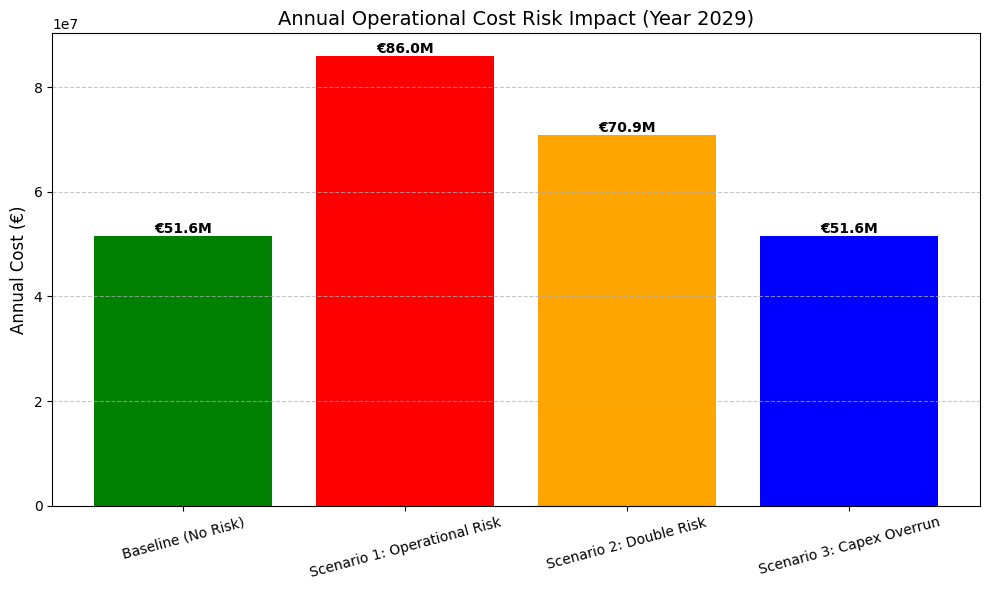

In [127]:
# PART 4: Visualization & Reporting 
summary_data = []
summary_data.append({
    "Scenario": "Baseline (No Risk)",
    "Headcount": peak_hc_2029,
    "Annual_Opex": base_labor_cost,
    "Capex": Base_Capex,
    "Risk_Impact_Opex": 0,
    "Risk_Impact_Capex": 0
})

summary_data.append({
    "Scenario": "Scenario 1: Operational Risk",
    "Headcount": required_hc,
    "Annual_Opex": new_labor_cost,
    "Capex": Base_Capex,
    "Risk_Impact_Opex": labor_cost_diff,
    "Risk_Impact_Capex": 0
})
summary_data.append({
    "Scenario": "Scenario 2: Double Risk",
    "Headcount": s2_required_hc,
    "Annual_Opex": s2_labor_cost,
    "Capex": Base_Capex,
    "Risk_Impact_Opex": s2_cost_diff,
    "Risk_Impact_Capex": 0
})

summary_data.append({
    "Scenario": "Scenario 3: Capex Overrun",
    "Headcount": peak_hc_2029,     # No change
    "Annual_Opex": base_labor_cost, # No change
    "Capex": New_Capex,
    "Risk_Impact_Opex": 0,
    "Risk_Impact_Capex": s3_capex_diff
})

print("\n" + "="*40)
print("FINAL REPORT GENERATION")
print("="*40)

df_summary = pd.DataFrame(summary_data)

pd.options.display.float_format = '€{:,.0f}'.format

print("\n--- Summary Table ---")
print(df_summary[['Scenario', 'Headcount', 'Annual_Opex', 'Risk_Impact_Opex']])

scenarios = df_summary['Scenario']
opex_values = df_summary['Annual_Opex']
colors = ['green', 'red', 'orange', 'blue']

plt.figure(figsize=(10, 6))
bars = plt.bar(scenarios, opex_values, color=colors)

plt.title('Annual Operational Cost Risk Impact (Year 2029)', fontsize=14)
plt.ylabel('Annual Cost (€)', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'€{height/1000000:.1f}M',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()